In [5]:
import os
from datetime import datetime

import pandas as pd
import numpy as np
from sklearn.metrics import balanced_accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

sns.set()

In [87]:
datafile="data/hidden_states.csv"
data = pd.read_csv(datafile)
data = data.drop(data[data.DX_mask == 0].index)
data = data.dropna(subset=["DXCHANGE"])
data.DXCHANGE = data.DXCHANGE.astype(int)

#data.DXCHANGE = data.DXCHANGE.where(data.DXCHANGE > 3, 0)
#data = data.drop(data[data.DXCHANGE == 0].index)
#data.DXCHANGE = data.DXCHANGE.where(data.DXCHANGE < 4, 1)
x = data.iloc[:,3:131]
data

,RID,TP,DX,DX_mask,hidden_0,hidden_1,hidden_2,hidden_3,hidden_4,hidden_5,...,hidden_120,hidden_121,hidden_122,hidden_123,hidden_124,hidden_125,hidden_126,hidden_127,cluster,DXCHANGE
0,2.0,6.0,0.0,1.0,-0.326462,0.013623,-0.121340,-0.061322,0.174480,0.429307,...,0.621976,-0.444028,0.072976,0.679904,-0.413200,0.108640,0.235828,-0.135060,3,1
5,2.0,36.0,0.0,1.0,-0.125128,0.167353,-0.435139,-0.155267,0.116786,0.740306,...,0.693898,-0.706921,0.321557,0.699811,-0.585326,0.470130,0.478737,-0.699555,3,1
9,2.0,60.0,0.0,1.0,-0.095401,0.172916,-0.519267,-0.139745,0.388942,0.631461,...,0.585240,-0.406028,0.270438,0.762265,-0.513358,0.644465,0.268194,-0.023257,0,1
11,2.0,72.0,0.0,1.0,-0.236064,0.236268,-0.592743,-0.169090,-0.034059,0.667493,...,0.711972,-0.682365,0.236683,0.788078,-0.509573,0.623525,0.429417,-0.485595,0,1
13,2.0,84.0,1.0,1.0,-0.137920,0.320162,-0.426267,-0.111352,0.013424,0.713440,...,0.662367,-0.670622,0.537434,0.690469,-0.663881,0.595498,0.505347,-0.439472,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,5290.0,6.0,0.0,1.0,-0.224710,0.007555,-0.136876,-0.035858,0.379966,0.339668,...,0.272492,-0.138853,-0.028540,0.710402,-0.268383,0.002763,0.302431,-0.343949,3,1
9388,5290.0,24.0,0.0,1.0,-0.013557,-0.009722,-0.193552,-0.271508,0.503671,0.694189,...,0.376807,-0.292157,-0.112678,0.825802,-0.521940,-0.013688,0.464258,-0.566406,3,1
9392,5294.0,24.0,0.0,1.0,-0.043405,-0.003036,-0.279255,-0.215493,0.539554,0.698843,...,0.696900,-0.445502,-0.065378,0.539572,-0.561894,0.037776,0.402366,-0.670824,3,1
9396,5295.0,24.0,0.0,1.0,-0.289028,0.008362,-0.355723,-0.107229,0.252775,0.423591,...,0.548213,-0.535705,-0.229536,0.497513,-0.338534,0.162906,0.313946,-0.592688,3,1


In [111]:
pca = PCA(n_components=4)
pca_result = pca.fit_transform(x.values)
pca_result = pd.DataFrame({"PCA-0":pca_result[:,0], "PCA-1":pca_result[:,1], "PCA-2":pca_result[:,2], "DX":data["DX"], "DXCHANGE":data["DXCHANGE"], "cluster":data["cluster"]})
#pca_result.DXCHANGE = pca_result.DXCHANGE.where(pca_result.DXCHANGE > 3, 0)
#pca_result = pca_result.drop(pca_result[pca_result.DXCHANGE == 0].index)

mapping = {
    0:"No Change",
    1:"CN",
    2:"MCI",
    3:"AD",
    4:"CN-MCI",
    5:"MCI-AD",
    6:"CN-AD",
    7:"MCI-CN",
    8:"AD-MCI"
}
pca_result.DXCHANGE = pca_result.DXCHANGE.map(mapping)
pca_result


,PCA-0,PCA-1,PCA-2,DX,DXCHANGE,cluster
0,-2.586796,2.357586,-0.632179,0.0,CN,3
5,-3.274155,1.368046,0.585595,0.0,CN,3
9,-1.841740,1.523967,-1.262164,0.0,CN,0
11,-2.885902,1.423222,-0.147437,0.0,CN,0
13,-2.358634,1.740584,-0.400454,1.0,CN-MCI,0
...,...,...,...,...,...,...
9385,-2.396971,1.933390,-0.536507,0.0,CN,3
9388,-3.427634,0.889596,-0.526976,0.0,CN,3
9392,-3.744948,1.695272,-0.041583,0.0,CN,3
9396,-2.826213,1.168273,0.279643,0.0,CN,3


In [53]:
pca.explained_variance_ratio_

array([0.52413   , 0.18300704, 0.05528397, 0.03434835])

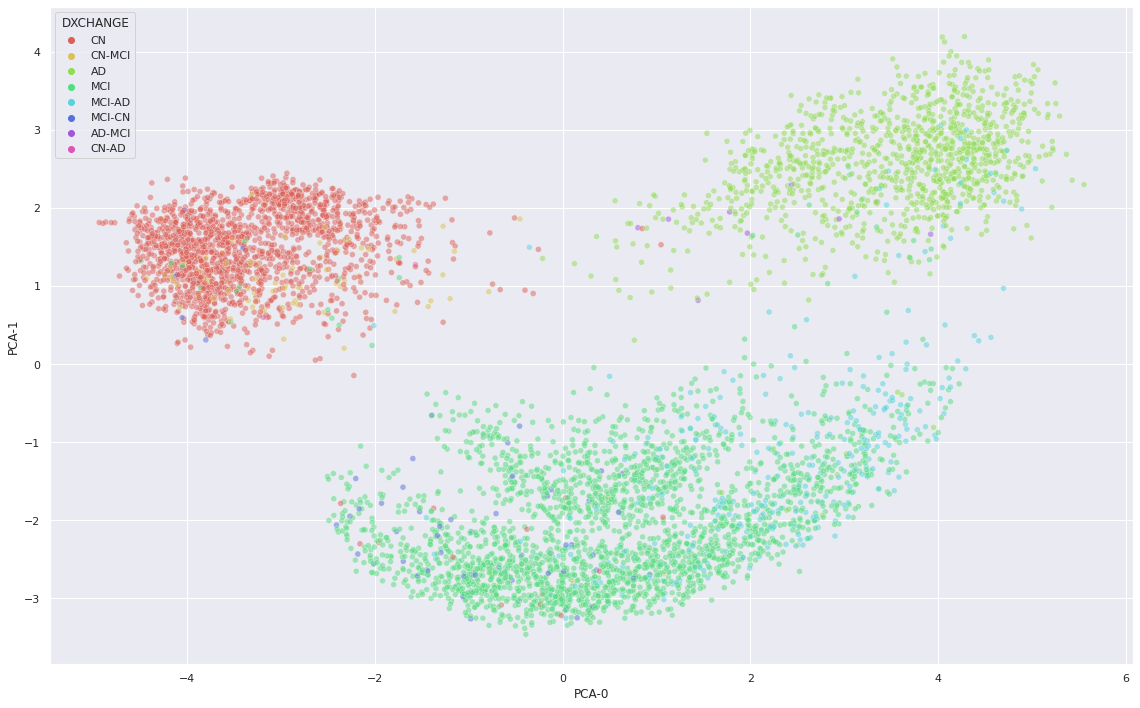

In [116]:
plt.figure(figsize=(16,10))
ax = sns.scatterplot(
    x="PCA-0", y="PCA-1",
    hue="DXCHANGE",
    palette=sns.color_palette("hls", 8),
    data=pca_result,
    legend="full",
    alpha=0.5
)
plt.tight_layout()
plt.savefig("figures/hidden_states_pca_color_transition_all.png")

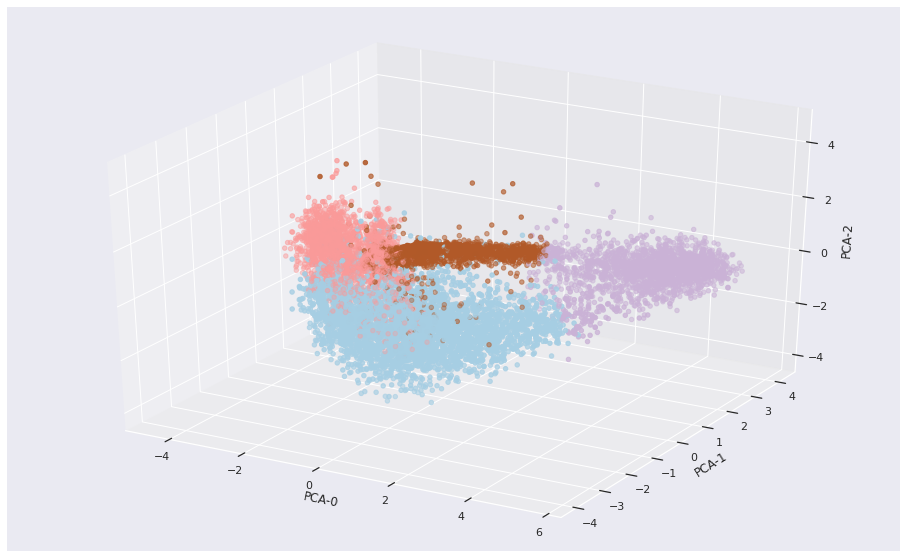

In [93]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=pca_result["PCA-0"],
    ys=pca_result["PCA-1"],
    zs=pca_result["PCA-2"],
    c=pca_result["cluster"], 
    cmap='Paired'
)
ax.set_xlabel('PCA-0')
ax.set_ylabel('PCA-1')
ax.set_zlabel('PCA-2')
plt.savefig("figures/hidden_states_pca_color_cluster4_3d.png")